# Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
# construct some data in 2-dim
mean = [0, 0]
cov = [[1, 3], [3, 4]]
data = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)
print(f'shape of the data is {data.shape}')

shape of the data is (1000, 2)


C:\Users\rigat\AppData\Local\Temp\ipykernel_15268\2964418936.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)


In [4]:
# eigenvectors are defined for squared matrices
# for A (m, n) find eigenvectors of A^T.A (n, n) and A.A^T (m, m)

# find the eigenvectors of the data of data^T.data,
# i.e. corresponding to the variance of the columns

eigen_values, eigen_vectors = np.linalg.eig(np.dot(data.T, data))

# reshape the eigenvectors to be the rows and the first to have the heighest eigenvalue
# reshpae and rescale the eigenvalues in descending order and taking the square roor
eigen_values = np.sqrt(eigen_values[::-1])
eigen_vectors = eigen_vectors.T[::-1]
print(f'first eigenvector is {eigen_vectors[0]} with eigenvalue {eigen_values[0]}')
print(f'second eigenvector is {eigen_vectors[1]} with eigenvalue {eigen_values[1]}')

first eigenvector is [-0.53266015 -0.84632923] with eigenvalue 75.762396606192
second eigenvector is [-0.84632923  0.53266015] with eigenvalue 28.802659203968542


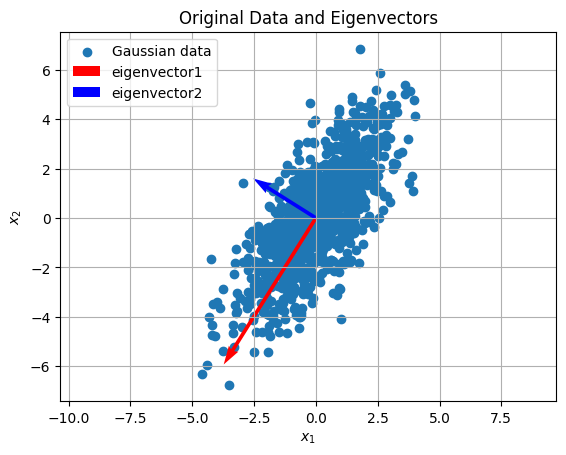

In [5]:
# plot data and eigenvectors

plt.scatter(data[:,0], data[:,1], label = 'Gaussian data')
scale1, scale2 = 7, 3 
plt.quiver(*scale1*eigen_vectors[0],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='r', 
           label='eigenvector1'
           )
plt.quiver(*scale2*eigen_vectors[1],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='b', 
           label='eigenvector2'
           )
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal scaling
plt.title('Original Data and Eigenvectors')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.legend()
plt.show()

In [18]:
# apply PCA on the data
pca = decomposition.PCA(n_components=2, svd_solver='full')
pca.fit(data)

# transform the data in the reduced space
x_pca_reduced = pca.transform(data)

# inverse transform the data in the original
x_pca_inverse = pca.inverse_transform(x_pca_reduced)

# transform the original eigenvectors in the reduced space
eigen_vector_reduced = pca.transform(eigen_vectors)

# transform the pca eigenvectors in the reduced space
pca_eigvec_reduced = pca.transform(pca.components_)

In [19]:
# estimate of the PCA for the eigenvalues and eigenvectors, 
# used to make the reduction 

print(f'PCA estimated first eigenvector is {pca.components_[0]} with eigenvalue {pca.singular_values_[0]}')
print(f'PCA estimated second eigenvector is {pca.components_[1]} with eigenvalue {pca.singular_values_[1]}')
print(f'first eigenvector is {eigen_vectors[0]} with eigenvalue {eigen_values[0]}')
print(f'second eigenvector is {eigen_vectors[1]} with eigenvalue {eigen_values[1]}')

PCA estimated first eigenvector is [0.53245361 0.84645918] with eigenvalue 75.71240513410653
PCA estimated second eigenvector is [ 0.84645918 -0.53245361] with eigenvalue 28.799372494188255
first eigenvector is [-0.53266015 -0.84632923] with eigenvalue 75.762396606192
second eigenvector is [-0.84632923  0.53266015] with eigenvalue 28.802659203968542


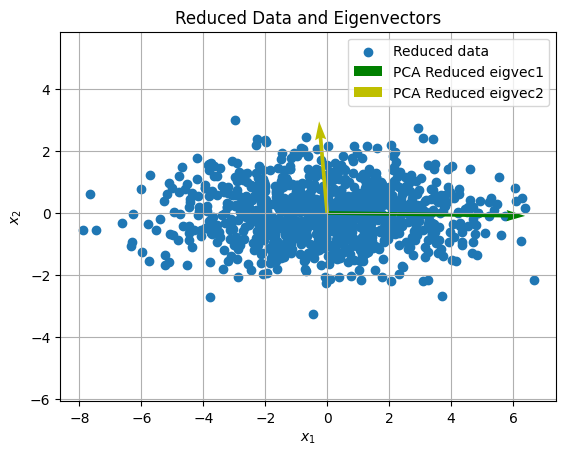

In [24]:
# plot reduced data and eigenvectors

plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], label = 'Reduced data')
scale1, scale2 = 7, 3 

plt.quiver(*scale1*pca_eigvec_reduced[0],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='g', 
           label='PCA Reduced eigvec1'
           )
plt.quiver(*scale2*pca_eigvec_reduced[1],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='y', 
           label='PCA Reduced eigvec2'
           )

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal scaling
plt.title('Reduced Data and Eigenvectors')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.legend()
plt.show()

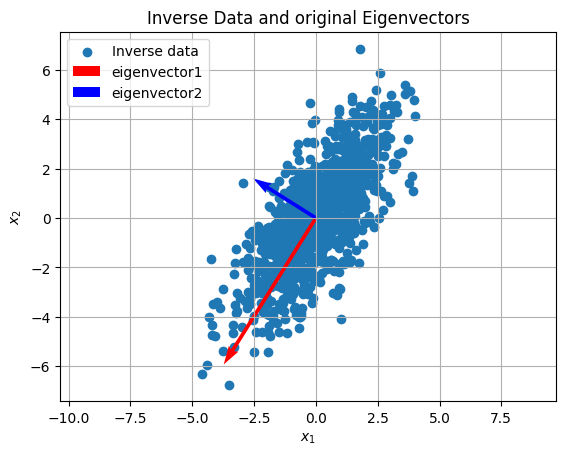

In [21]:
# plot inverse data and eigenvectors

plt.scatter(x_pca_inverse[:, 0], x_pca_inverse[:, 1], label = 'Inverse data')
scale1, scale2 = 7, 3 
plt.quiver(*scale1*eigen_vectors[:, 0],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='r', 
           label='eigenvector1'
           )
plt.quiver(*scale2*eigen_vectors[:, 1],
            angles='xy', 
           scale_units='xy',
           scale=1, 
           color='b', 
           label='eigenvector2'
           )
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal scaling
plt.title('Inverse Data and original Eigenvectors')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.legend()
plt.show()